In [1]:
from matplotlib import pylab as plt
import numpy as np

### Load image 

In [2]:
input_file_name='test 2_data.raw'
im=np.fromfile(input_file_name,dtype='uint16')  # load files with correct data type
pixPerFrame=(520*520)+2 #2 extra pixels are saved in with meta data, the first one is frame number starting 0
nFrames=int(im.size/pixPerFrame) #work out number of frames in dataset, recast as int for reshape function
print("nFrames",nFrames)
im=im.reshape([nFrames,pixPerFrame]) #reshape to a list of frames 
print(im) 

nFrames 200
[[   1    0 2475 ...  920  943  842]
 [   2    0  677 ...  913  935  844]
 [   3    0  682 ...  917  923  845]
 ...
 [ 198    0  690 ...  932  936  845]
 [ 199    0  690 ...  923  952  852]
 [ 200    0  684 ...  930  948  842]]


### Remove metadata, leaving only image data and removing dodgy frame 0


In [3]:
im=im[1:,2:] #only include from frame 1 to end, and pixel 2 to end
print(im.shape) 
#Do remember if you execute this box twice, you will cut another frame off and 2 pixels
#Hence you'll have to reload the image

(199, 270400)


### Reshape array to 3D array, ie.  a list of frames of 2D images

In [4]:
im=im.reshape([nFrames-1,520,520])
im.shape


(199, 520, 520)

### View first image

(199, 520, 520)
(520, 520)


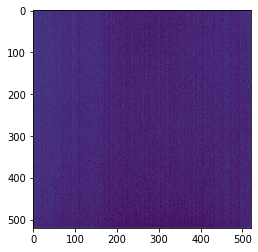

In [5]:
print(im.shape)
first_im=im[0,:,:] #other frame and all y pixels and all x pixels
print(first_im.shape)
plt.imshow(first_im)

### Look at properties of image

In [6]:
mean_frame_0=first_im.mean()
std_frame_0=first_im.std()
min_frame_0=first_im.min()
max_frame_0=first_im.max()

print("mean:",mean_frame_0,"  std:",std_frame_0,"  min:",min_frame_0,"  max:",max_frame_0)

mean: 624.0254659763314   std: 54.89122563561418   min: 413   max: 2374


### You should consider how many stan devs from the mean is an acceptable window for a working pixel.
#### How many do you cut out if you choose 3x std for example

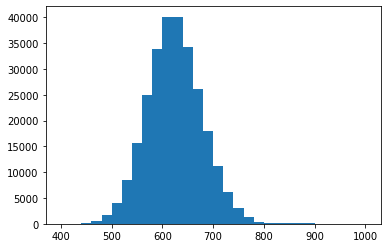

In [7]:
first_im_1D=first_im.flatten() #convert back to 1D for histogramming
_=plt.hist(first_im_1D,bins=30,range=(400,1000))

### Look at standard deviation across all frames

before std:  (199, 520, 520)
after std:  (520, 520)
max:  32.52651367059409   min 3.7946719707068954
test 2_data


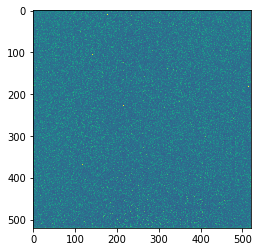

In [8]:
print("before std: ",im.shape) #just checking...
std_all_frames=im.std(axis=0) # as the first (0th) axis is frames this takes a standard deviation across
# all frames producing an image which shows the std of each pixel
print("after std: ",std_all_frames.shape) #just checking...
print("max: ",std_all_frames.max(),"  min",std_all_frames.min())

plt.imshow(std_all_frames)
plt.clim(0,15) #adjust the colour range 

plt.savefig("output_std_map_"+str(input_file_name)) #raw file
plt.savefig("output_std_map_"+str(input_file_name[:-4])+".png") #raw file
print(input_file_name[:-4]) #removes last 4 chars, ie. ".raw"


### Save subset


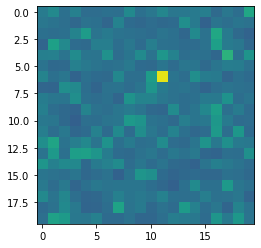

In [15]:
subset_std=std_all_frames[100:120,130:150]
plt.imshow(subset_std)
plt.clim(0,15) #adjust the colour range 
plt.savefig("output_subset_std_map_"+str(input_file_name[:-4])+".png") #raw file

### So is that ^ a dodgy pixel or a cosmic ray?
### Have a look a using boolean masks in numpy
eg...

In [36]:
a_array=np.random.randint(9,size=(3,3))
print (a_array)
b_array=np.random.randint(9,size=(3,3))
print (b_array)
truth_array=b_array>3 #this can, for example, tell you the location of everywhere there is a pixel over a certain value
print (truth_array)

[[3 3 7]
 [0 2 7]
 [0 0 8]]
[[5 4 5]
 [2 8 1]
 [0 4 4]]
[[ True  True  True]
 [False  True False]
 [False  True  True]]


In [37]:
a_array[b_array>3]=0
a_array

array([[0, 0, 0],
       [0, 0, 7],
       [0, 0, 0]])

In [40]:
b_array[b_array<3] #gives values of all pixels which are inside the range

array([2, 1, 0])